In [1]:
import pandas as pd
import numpy as np
import datetime as dt


In [2]:
df = pd.read_excel("Data files\BankNiftyFutures_Data5Min.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91737 entries, 0 to 91736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ticker             91737 non-null  object        
 1   Date               91737 non-null  datetime64[ns]
 2   Final Date format  91737 non-null  int64         
 3   Time               91737 non-null  object        
 4   Open 5             91737 non-null  float64       
 5   High 5             91737 non-null  float64       
 6   Low 5              91737 non-null  float64       
 7   Close 5            91737 non-null  float64       
 8   Volume 5           91737 non-null  int64         
 9   Year               91737 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 7.0+ MB


In [3]:
df['Date'] = df['Date'].astype('str').str.cat(df['Time'].astype('str'), sep =' ')
df['Date'] = df['Date'].astype('datetime64[ns]')
df

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,BANKNIFTY_F1,2015-01-01 09:20:00,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,BANKNIFTY_F1,2015-01-01 09:25:00,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,BANKNIFTY_F1,2015-01-01 09:30:00,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,BANKNIFTY_F1,2015-01-01 09:35:00,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,BANKNIFTY_F1,2015-01-01 09:40:00,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015
...,...,...,...,...,...,...,...,...,...,...
91732,BANKNIFTY_F1,2019-12-31 15:06:00,20191231,15:06:00,32398.1992,32400.0000,32382.8008,32389.0000,18900,2019
91733,BANKNIFTY_F1,2019-12-31 15:11:00,20191231,15:11:00,32390.3496,32390.4004,32382.0000,32382.0000,26820,2019
91734,BANKNIFTY_F1,2019-12-31 15:16:00,20191231,15:16:00,32383.5000,32386.8008,32320.0000,32320.8008,128780,2019
91735,BANKNIFTY_F1,2019-12-31 15:21:00,20191231,15:21:00,32327.8008,32392.6992,32324.4492,32371.6992,80260,2019


In [4]:
req_data = df[['Date','Open 5','High 5','Low 5','Close 5','Volume 5']]
req_data

,Date,Open 5,High 5,Low 5,Close 5,Volume 5
0,2015-01-01 09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825
1,2015-01-01 09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925
2,2015-01-01 09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000
3,2015-01-01 09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025
4,2015-01-01 09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100
...,...,...,...,...,...,...
91732,2019-12-31 15:06:00,32398.1992,32400.0000,32382.8008,32389.0000,18900
91733,2019-12-31 15:11:00,32390.3496,32390.4004,32382.0000,32382.0000,26820
91734,2019-12-31 15:16:00,32383.5000,32386.8008,32320.0000,32320.8008,128780
91735,2019-12-31 15:21:00,32327.8008,32392.6992,32324.4492,32371.6992,80260


In [5]:
data15 = req_data.resample('15T', on='Date').sum().reset_index()
data15

,Date,Open 5,High 5,Low 5,Close 5,Volume 5
0,2015-01-01 09:15:00,37669.3496,37702.9492,37595.1992,37637.3496,125750
1,2015-01-01 09:30:00,56457.0000,56471.4492,56405.0000,56440.0488,105125
2,2015-01-01 09:45:00,56461.9492,56518.9512,56450.5508,56504.8008,79575
3,2015-01-01 10:00:00,56533.9512,56560.8008,56510.3516,56542.7500,47300
4,2015-01-01 10:15:00,56524.4004,56547.0000,56499.1504,56517.6504,27800
...,...,...,...,...,...,...
175220,2019-12-31 14:15:00,97278.2012,97308.2500,97212.7500,97244.9492,96960
175221,2019-12-31 14:30:00,97251.8496,97308.1504,97234.7480,97268.0996,56520
175222,2019-12-31 14:45:00,97280.7500,97300.8984,97218.6504,97236.7988,114820
175223,2019-12-31 15:00:00,97169.1992,97198.0996,97141.4512,97169.0000,95220


In [16]:
d_30_45 = data15.Date.astype('str').str.split("[:, ]",expand = True)
#print(d_30_45)
data = data15[(d_30_45[1] == '09')&(d_30_45[2] >= '30')]
data['Date'] = data['Date'].astype('str').str.split(' ', expand = True)[0].astype('datetime64[ns]')
data = data.groupby('Date').sum().reset_index()
data
#d_30_45

<ipython-input-16-e2eca81dfc43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].astype('str').str.split(' ', expand = True)[0].astype('datetime64[ns]')


,Date,Open 5,High 5,Low 5,Close 5,Volume 5
0,2015-01-01,112918.9492,112990.4004,112855.5508,112944.8496,184700
1,2015-01-02,114239.0996,114417.2500,114191.5488,114359.7500,512675
2,2015-01-03,0.0000,0.0000,0.0000,0.0000,0
3,2015-01-04,0.0000,0.0000,0.0000,0.0000,0
4,2015-01-05,115108.2520,115180.6992,115041.4024,115113.5000,185425
...,...,...,...,...,...,...
1821,2019-12-27,194109.0508,194275.7500,194043.4980,194200.2988,393040
1822,2019-12-28,0.0000,0.0000,0.0000,0.0000,0
1823,2019-12-29,0.0000,0.0000,0.0000,0.0000,0
1824,2019-12-30,196264.8496,196401.8516,196208.4980,196342.6992,278980


In [19]:
d315 = data15[(d_30_45[1] == '15') & (d_30_45[2] == '15')]
d315['Date'] = d315['Date'].astype('str').str.split(' ', expand = True)[0].astype('datetime64[ns]')
d315 = d315.groupby('Date').sum().reset_index()
d315

<ipython-input-19-779583d447a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d315['Date'] = d315['Date'].astype('str').str.split(' ', expand = True)[0].astype('datetime64[ns]')


,Date,Open 5,High 5,Low 5,Close 5,Volume 5
0,2015-01-01,56700.8008,56715.9004,56686.1504,56697.0000,62575
1,2015-01-02,57626.0000,57671.6992,57605.5508,57650.5996,165600
2,2015-01-03,0.0000,0.0000,0.0000,0.0000,0
3,2015-01-04,0.0000,0.0000,0.0000,0.0000,0
4,2015-01-05,57451.7500,57482.0996,57441.5000,57453.9004,124875
...,...,...,...,...,...,...
1821,2019-12-27,97825.6992,97879.0488,97797.5508,97835.9512,201860
1822,2019-12-28,0.0000,0.0000,0.0000,0.0000,0
1823,2019-12-29,0.0000,0.0000,0.0000,0.0000,0
1824,2019-12-30,97607.7480,97679.6504,97605.2500,97630.9512,141040


In [13]:
def calculateVwap(data):
    data['TP'] = (data['High 5']+data['Low 5']+data['Close 5'])/3.0
    data['TradedValue']  = data['TP']*data['Volume 5']
    data['CumVolume'] = data['Volume 5'].cumsum()
    data['CumTradedValue'] = data['TradedValue'].cumsum()
    data['VWAP'] = data['CumTradedValue'] /data['CumVolume']
    return data

In [23]:
df1 = data.groupby('Date').apply(calculateVwap)

In [21]:
#df1

,Date,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01,112918.9492,112990.4004,112855.5508,112944.8496,184700,112930.266933,2.085822e+10,184700,2.085822e+10,112930.266933
1,2015-01-02,114239.0996,114417.2500,114191.5488,114359.7500,512675,114322.849600,5.861047e+10,512675,5.861047e+10,114322.849600
2,2015-01-03,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
3,2015-01-04,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
4,2015-01-05,115108.2520,115180.6992,115041.4024,115113.5000,185425,115111.867200,2.134462e+10,185425,2.134462e+10,115111.867200
...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,194109.0508,194275.7500,194043.4980,194200.2988,393040,194173.182267,7.631783e+10,393040,7.631783e+10,194173.182267
1822,2019-12-28,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
1823,2019-12-29,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
1824,2019-12-30,196264.8496,196401.8516,196208.4980,196342.6992,278980,196317.682933,5.476871e+10,278980,5.476871e+10,196317.682933


In [20]:
df2 = d315.groupby('Date').apply(calculateVwap)

In [24]:
#df2

,Date,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01,56700.8008,56715.9004,56686.1504,56697.0000,62575,56699.683600,3.547983e+09,62575,3.547983e+09,56699.683600
1,2015-01-02,57626.0000,57671.6992,57605.5508,57650.5996,165600,57642.616533,9.545617e+09,165600,9.545617e+09,57642.616533
2,2015-01-03,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
3,2015-01-04,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
4,2015-01-05,57451.7500,57482.0996,57441.5000,57453.9004,124875,57459.166667,7.175213e+09,124875,7.175213e+09,57459.166667
...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,97825.6992,97879.0488,97797.5508,97835.9512,201860,97837.516933,1.974948e+10,201860,1.974948e+10,97837.516933
1822,2019-12-28,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
1823,2019-12-29,0.0000,0.0000,0.0000,0.0000,0,0.000000,0.000000e+00,0,0.000000e+00,NaN
1824,2019-12-30,97607.7480,97679.6504,97605.2500,97630.9512,141040,97638.617200,1.377095e+10,141040,1.377095e+10,97638.617200


In [25]:
profit_df1 = df1[df1['Close 5'] > df1['VWAP']]
profit_df1

,Date,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
0,2015-01-01,112918.9492,112990.4004,112855.5508,112944.8496,184700,112930.266933,2.085822e+10,184700,2.085822e+10,112930.266933
1,2015-01-02,114239.0996,114417.2500,114191.5488,114359.7500,512675,114322.849600,5.861047e+10,512675,5.861047e+10,114322.849600
4,2015-01-05,115108.2520,115180.6992,115041.4024,115113.5000,185425,115111.867200,2.134462e+10,185425,2.134462e+10,115111.867200
7,2015-01-08,111578.1016,111649.5996,111461.8028,111573.0976,280475,111561.500000,3.129021e+10,280475,3.129021e+10,111561.500000
11,2015-01-12,111948.0488,112258.5000,111927.8984,112148.5508,406300,112111.649733,4.555096e+10,406300,4.555096e+10,112111.649733
...,...,...,...,...,...,...,...,...,...,...,...
1811,2019-12-17,193038.0000,193202.2012,192983.3008,193126.9492,406400,193104.150400,7.847753e+10,406400,7.847753e+10,193104.150400
1814,2019-12-20,193972.0020,194094.6504,193899.7500,194007.8008,296700,194000.733733,5.756002e+10,296700,5.756002e+10,194000.733733
1820,2019-12-26,193454.3516,193502.8496,193421.5996,193471.4512,154620,193465.300133,2.991360e+10,154620,2.991360e+10,193465.300133
1821,2019-12-27,194109.0508,194275.7500,194043.4980,194200.2988,393040,194173.182267,7.631783e+10,393040,7.631783e+10,194173.182267


In [26]:
temp = pd.merge(profit_df1,df2,on='Date')
temp

,Date,Open 5_x,High 5_x,Low 5_x,Close 5_x,Volume 5_x,TP_x,TradedValue_x,CumVolume_x,CumTradedValue_x,...,Open 5_y,High 5_y,Low 5_y,Close 5_y,Volume 5_y,TP_y,TradedValue_y,CumVolume_y,CumTradedValue_y,VWAP_y
0,2015-01-01,112918.9492,112990.4004,112855.5508,112944.8496,184700,112930.266933,2.085822e+10,184700,2.085822e+10,...,56700.8008,56715.9004,56686.1504,56697.0000,62575,56699.683600,3.547983e+09,62575,3.547983e+09,56699.683600
1,2015-01-02,114239.0996,114417.2500,114191.5488,114359.7500,512675,114322.849600,5.861047e+10,512675,5.861047e+10,...,57626.0000,57671.6992,57605.5508,57650.5996,165600,57642.616533,9.545617e+09,165600,9.545617e+09,57642.616533
2,2015-01-05,115108.2520,115180.6992,115041.4024,115113.5000,185425,115111.867200,2.134462e+10,185425,2.134462e+10,...,57451.7500,57482.0996,57441.5000,57453.9004,124875,57459.166667,7.175213e+09,124875,7.175213e+09,57459.166667
3,2015-01-08,111578.1016,111649.5996,111461.8028,111573.0976,280475,111561.500000,3.129021e+10,280475,3.129021e+10,...,56341.2500,56350.1484,56302.6504,56315.6484,145925,56322.815733,8.218907e+09,145925,8.218907e+09,56322.815733
4,2015-01-12,111948.0488,112258.5000,111927.8984,112148.5508,406300,112111.649733,4.555096e+10,406300,4.555096e+10,...,56650.0508,56683.1992,56634.0000,56672.7988,187250,56663.332667,1.061021e+10,187250,1.061021e+10,56663.332667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2019-12-17,193038.0000,193202.2012,192983.3008,193126.9492,406400,193104.150400,7.847753e+10,406400,7.847753e+10,...,96599.1504,96633.5488,96587.6016,96612.4512,171180,96611.200533,1.653791e+10,171180,1.653791e+10,96611.200533
634,2019-12-20,193972.0020,194094.6504,193899.7500,194007.8008,296700,194000.733733,5.756002e+10,296700,5.756002e+10,...,97115.2988,97168.4004,97109.5488,97147.0508,157680,97141.666667,1.531730e+10,157680,1.531730e+10,97141.666667
635,2019-12-26,193454.3516,193502.8496,193421.5996,193471.4512,154620,193465.300133,2.991360e+10,154620,2.991360e+10,...,96020.2012,96047.4492,95993.5488,96011.6992,194080,96017.565733,1.863509e+10,194080,1.863509e+10,96017.565733
636,2019-12-27,194109.0508,194275.7500,194043.4980,194200.2988,393040,194173.182267,7.631783e+10,393040,7.631783e+10,...,97825.6992,97879.0488,97797.5508,97835.9512,201860,97837.516933,1.974948e+10,201860,1.974948e+10,97837.516933


In [28]:
Total_profit = pd.DataFrame({})

Total_profit['Date'] = temp['Date']
Total_profit['Open 5'] = temp['Open 5_x'] + temp['Open 5_y']
Total_profit['High 5'] = temp['High 5_x'] + temp['High 5_y']
Total_profit['Low 5'] = temp['Low 5_x'] + temp['Low 5_y']
Total_profit['Close 5'] = temp['Close 5_x'] + temp['Close 5_y']
Total_profit['Volume 5'] = temp['Volume 5_x'] + temp['Volume 5_y']
Total_profit['TP'] = temp['TP_x'] + temp['TP_y']
Total_profit['TradedValue'] = temp['TradedValue_x'] + temp['TradedValue_y']
Total_profit['CumTradedValue'] = temp['CumTradedValue_x'] + temp['CumTradedValue_y']
Total_profit['VWAP'] = temp['VWAP_x'] + temp['VWAP_y']

Total_profit

,Date,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumTradedValue,VWAP
0,2015-01-01,169619.7500,169706.3008,169541.7012,169641.8496,247275,169629.950533,2.440620e+10,2.440620e+10,169629.950533
1,2015-01-02,171865.0996,172088.9492,171797.0996,172010.3496,678275,171965.466133,6.815608e+10,6.815608e+10,171965.466133
2,2015-01-05,172560.0020,172662.7988,172482.9024,172567.4004,310300,172571.033867,2.851983e+10,2.851983e+10,172571.033867
3,2015-01-08,167919.3516,167999.7480,167764.4532,167888.7460,426400,167884.315733,3.950912e+10,3.950912e+10,167884.315733
4,2015-01-12,168598.0996,168941.6992,168561.8984,168821.3496,593550,168774.982400,5.616117e+10,5.616117e+10,168774.982400
...,...,...,...,...,...,...,...,...,...,...
633,2019-12-17,289637.1504,289835.7500,289570.9024,289739.4004,577580,289715.350933,9.501543e+10,9.501543e+10,289715.350933
634,2019-12-20,291087.3008,291263.0508,291009.2988,291154.8516,454380,291142.400400,7.287732e+10,7.287732e+10,291142.400400
635,2019-12-26,289474.5528,289550.2988,289415.1484,289483.1504,348700,289482.865867,4.854869e+10,4.854869e+10,289482.865867
636,2019-12-27,291934.7500,292154.7988,291841.0488,292036.2500,594900,292010.699200,9.606731e+10,9.606731e+10,292010.699200


In [30]:
Total_profit_year = Total_profit[['Date','TP']].resample('1Y', on='Date').sum().reset_index()

Total_profit_day = Total_profit[['Date','TP']].resample('D', on='Date').sum().reset_index()

profit = Total_profit['TP'].sum()
print("TOTAL PROFIT:",profit)

TOTAL PROFIT: 130031239.58933333


In [31]:
loss = df1[df1['Close 5'] < df1['VWAP']]

total_loss = loss['TP'].sum()

loss_year = loss[['Date','TP']].resample('Y', on='Date').sum().reset_index()

loss_day = loss[['Date','TP']].resample('D', on='Date').sum().reset_index()

print("TOTAL LOSS:",total_loss)

TOTAL LOSS: 80525643.60993333


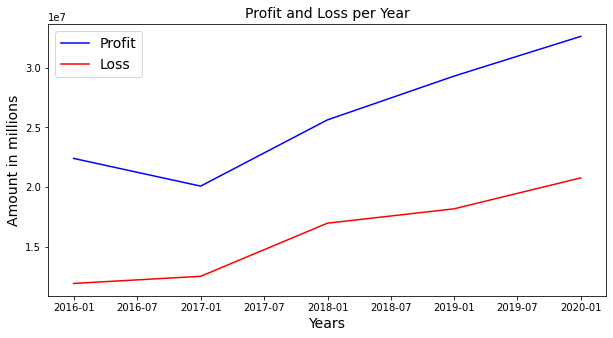

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Total_profit_year.Date,Total_profit_year.TP, color = 'blue', label = 'Profit')
plt.plot(loss_year.Date,loss_year.TP, color = 'red', label = 'Loss')

plt.title('Profit and Loss per Year',fontsize = 14)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Amount in millions',fontsize = 14)
plt.legend(fontsize = 14)

plt.show()

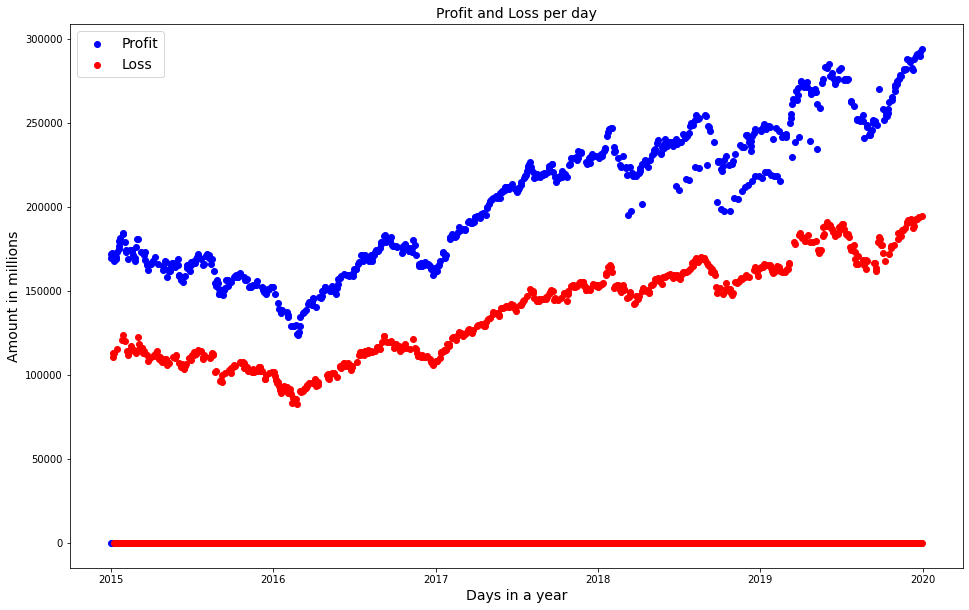

In [36]:
plt.figure(figsize = (16,10))
plt.scatter(Total_profit_day.Date,Total_profit_day.TP, color = 'blue',label = 'Profit')
plt.scatter(loss_day.Date,loss_day.TP, color = 'red', label = 'Loss')

plt.title('Profit and Loss per day',fontsize = 14)
plt.xlabel('Days in a year',fontsize = 14)
plt.ylabel('Amount in millions',fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

### By looking the graphs we can see that from year 2016 to 2017 there is decrease in profits and slight increasing in loss 
###  from 2017 to 2018 there is drastic change in profits it got increased.